In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv(r'C:\Users\Chinu\Downloads\storedata.csv')

In [30]:
df.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


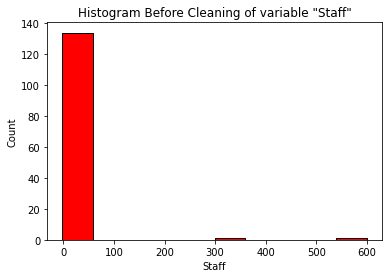

In [31]:
# print initial histogram
plt.hist(df['Staff'], color='red', edgecolor='black')
plt.title('Histogram Before Cleaning of variable "Staff"')
plt.xlabel('Staff')
plt.ylabel('Count')
plt.show()

In [32]:
# clean data by setting negative values to zero
df.loc[df['Staff'] < 0, 'Staff'] = 0

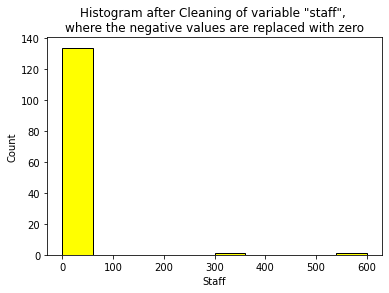

In [33]:
# print histogram after cleaning
plt.hist(df['Staff'], color='yellow', edgecolor='black')
plt.title('Histogram after Cleaning of variable "staff", \nwhere the negative values are replaced with zero')
plt.xlabel('Staff')
plt.ylabel('Count')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [35]:
# Drop unnecessary columns
df = df.drop(['Town', 'Country', 'Store ID', 'Manager name'], axis=1)

In [36]:
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Car park', 'Location'])

In [37]:
# Split data into features and target
X = df.drop('Performance', axis=1)
y = df['Performance']


In [38]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Define the models and hyperparameters to be tested
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l2']
        },
        'metric': 'accuracy'
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [5, 10, 20, 30, 40],
            'min_samples_split': [2, 5, 10, 20]
        },
        'metric': 'recall'
    },
    'Neural Network': {
        'model': MLPClassifier(),
        'params': {
            'hidden_layer_sizes': [(5), (10), (20), (30)],
            'activation': ['relu', 'tanh', 'logistic'],
            'alpha': [0.0001, 0.001, 0.01, 0.1]
        },
        'metric': 'precision'
    }
}

In [40]:
# Train and test each model using cross-validation and grid search
results = []
for model_name, model_params in models.items():
    model = GridSearchCV(model_params['model'], model_params['params'], cv=5, scoring=model_params['metric'])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'model': model_name,
        'best_params': model.best_params_,
        'train_score': model.best_score_,
        'test_score': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, pos_label='Good'),
        'recall': recall_score(y_test, y_pred, pos_label='Good'),
        'f1_score': f1_score(y_test, y_pred, pos_label='Good'),
        'confusion_matrix': confusion_matrix(y_test, y_pred, labels=['Good', 'Bad'])
    })

C:\Users\Chinu\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Chinu\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Chinu\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Chinu\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Chinu\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 1901, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "C:\Users\Chinu\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 1544, in precision_recall_fscore_support
  

In [41]:
# Print results in a table
results_df = pd.DataFrame(results)
cols = ['model', 'best_params', 'train_score', 'test_score', 'precision', 'recall', 'f1_score', 'confusion_matrix']
print(results_df[cols])

                 model                                        best_params  \
0  Logistic Regression                      {'C': 0.001, 'penalty': 'l2'}   
1        Decision Tree           {'max_depth': 5, 'min_samples_split': 2}   
2       Neural Network  {'activation': 'relu', 'alpha': 0.0001, 'hidde...   

   train_score  test_score  precision    recall  f1_score     confusion_matrix  
0          0.6    0.560976   0.642857  0.409091  0.500000   [[9, 13], [5, 14]]  
1          NaN    0.487805   0.526316  0.454545  0.487805  [[10, 12], [9, 10]]  
2          NaN    0.536585   0.600000  0.409091  0.486486   [[9, 13], [6, 13]]  


In [42]:
lr = LogisticRegression(penalty='l2', C=0.001)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label='Good')
rec = recall_score(y_test, y_pred, pos_label='Good')
f1 = f1_score(y_test, y_pred, pos_label='Good')
cm = confusion_matrix(y_test, y_pred, labels=['Good', 'Bad'])


In [43]:
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1 Score:', f1)
print('Confusion Matrix:\n', cm)

Accuracy: 0.5609756097560976
Precision: 0.6428571428571429
Recall: 0.4090909090909091
F1 Score: 0.5000000000000001
Confusion Matrix:
 [[ 9 13]
 [ 5 14]]


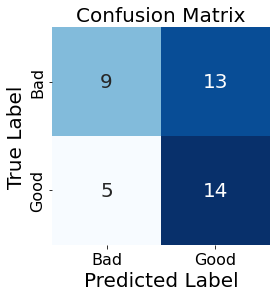

In [44]:
import seaborn as sns

# Get the confusion matrix from the results dataframe
conf_matrix = results_df.loc[results_df['model'] == 'Logistic Regression', 'confusion_matrix'].values[0]

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 20}, square=True)
plt.xlabel('Predicted Label', fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.xticks([0.5, 1.5], ['Bad', 'Good'], fontsize=16)
plt.yticks([0.5, 1.5], ['Bad', 'Good'], fontsize=16)
plt.title('Confusion Matrix', fontsize=20)
plt.show()
